<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,75.566592,47.667361,-0.001996,133.231957,133.233969,-0.002012
1,0.0,1.0,87.628946,74.219344,0.003966,171.852256,171.848396,0.003860
2,0.0,2.0,84.749092,78.387556,0.003096,173.139745,173.136663,0.003082
3,0.0,3.0,45.542580,99.410898,0.004258,154.957736,154.952489,0.005246
4,0.0,4.0,58.436612,34.761755,-0.016214,103.182153,103.198092,-0.015939
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.290611,23.228440,0.009386,114.528436,114.519739,0.008697
29996,999.0,26.0,24.981691,91.714391,0.003740,126.699822,126.695345,0.004477
29997,999.0,27.0,47.176297,24.653992,0.018613,81.848902,81.831173,0.017729
29998,999.0,28.0,21.787990,63.796335,0.006856,95.591181,95.584347,0.006834


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,75.566592,47.667361,-0.001996,133.231957,133.233969,-0.002012
1,0.0,1.0,87.628946,74.219344,0.003966,171.852256,171.848396,0.003860
2,0.0,2.0,84.749092,78.387556,0.003096,173.139745,173.136663,0.003082
3,0.0,3.0,45.542580,99.410898,0.004258,154.957736,154.952489,0.005246
4,0.0,4.0,58.436612,34.761755,-0.016214,103.182153,103.198092,-0.015939
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.290611,23.228440,0.009386,114.528436,114.519739,0.008697
29996,999.0,26.0,24.981691,91.714391,0.003740,126.699822,126.695345,0.004477
29997,999.0,27.0,47.176297,24.653992,0.018613,81.848902,81.831173,0.017729
29998,999.0,28.0,21.787990,63.796335,0.006856,95.591181,95.584347,0.006834


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    75.566592  47.667361 -0.001996  133.231957  133.233969 -0.002012
      1.0    87.628946  74.219344  0.003966  171.852256  171.848396  0.003860
      2.0    84.749092  78.387556  0.003096  173.139745  173.136663  0.003082
      3.0    45.542580  99.410898  0.004258  154.957736  154.952489  0.005246
      4.0    58.436612  34.761755 -0.016214  103.182153  103.198092 -0.015939
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.290611  23.228440  0.009386  114.528436  114.519739  0.008697
      26.0   24.981691  91.714391  0.003740  126.699822  126.695345  0.004477
      27.0   47.176297  24.653992  0.018613   81.848902   81.831173  0.017729
      28.0   21.787990  63.796335  0.006856   95.591181   95.584347  0.006834
      29.0   26.649653  48.644132  0.003728   85.297513   85.294174  0.003339

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    75.566592  47.667361 -0.001996  133.231957  133.233969 -0.002012
      1.0    87.628946  74.219344  0.003966  171.852256  171.848396  0.003860
      2.0    84.749092  78.387556  0.003096  173.139745  173.136663  0.003082
      3.0    45.542580  99.410898  0.004258  154.957736  154.952489  0.005246
      4.0    58.436612  34.761755 -0.016214  103.182153  103.198092 -0.015939
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.290611  23.228440  0.009386  114.528436  114.519739  0.008697
      26.0   24.981691  91.714391  0.003740  126.699822  126.695345  0.004477
      27.0   47.176297  24.653992  0.018613   81.848902   81.831173  0.017729
      28.0   21.787990  63.796335  0.006856   95.591181   95.584347  0.006834
      29.0   26.649653  48.644132  0.003728   85.297513   85.294174  0.003339

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,75.566592,47.667361,-0.001996,133.231957,133.233969,-0.002012
1,0.0,1.0,87.628946,74.219344,0.003966,171.852256,171.848396,0.003860
2,0.0,2.0,84.749092,78.387556,0.003096,173.139745,173.136663,0.003082
3,0.0,3.0,45.542580,99.410898,0.004258,154.957736,154.952489,0.005246
4,0.0,4.0,58.436612,34.761755,-0.016214,103.182153,103.198092,-0.015939
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.290611,23.228440,0.009386,114.528436,114.519739,0.008697
29996,999.0,26.0,24.981691,91.714391,0.003740,126.699822,126.695345,0.004477
29997,999.0,27.0,47.176297,24.653992,0.018613,81.848902,81.831173,0.017729
29998,999.0,28.0,21.787990,63.796335,0.006856,95.591181,95.584347,0.006834


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    75.566592  47.667361 -0.001996  133.231957  133.233969 -0.002012
      1.0    87.628946  74.219344  0.003966  171.852256  171.848396  0.003860
      2.0    84.749092  78.387556  0.003096  173.139745  173.136663  0.003082
      3.0    45.542580  99.410898  0.004258  154.957736  154.952489  0.005246
      4.0    58.436612  34.761755 -0.016214  103.182153  103.198092 -0.015939
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.290611  23.228440  0.009386  114.528436  114.519739  0.008697
      26.0   24.981691  91.714391  0.003740  126.699822  126.695345  0.004477
      27.0   47.176297  24.653992  0.018613   81.848902   81.831173  0.017729
      28.0   21.787990  63.796335  0.006856   95.591181   95.584347  0.006834
      29.0   26.649653  48.644132  0.003728   85.297513   85.294174  0.003339

[30000 rows x 6 columns]

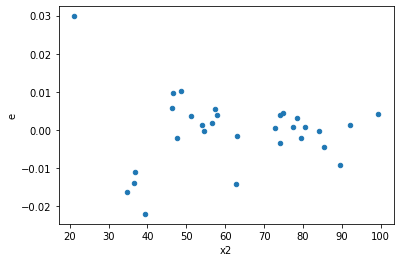

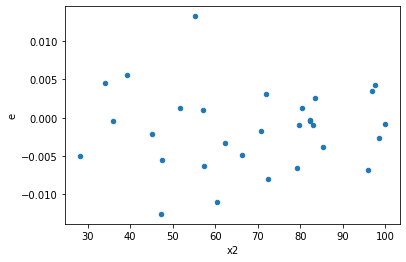

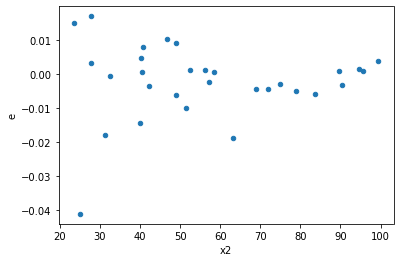

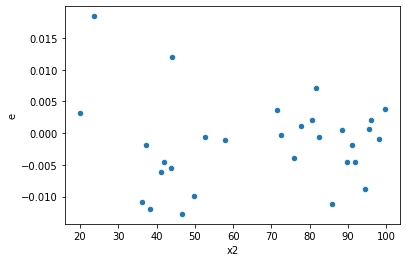

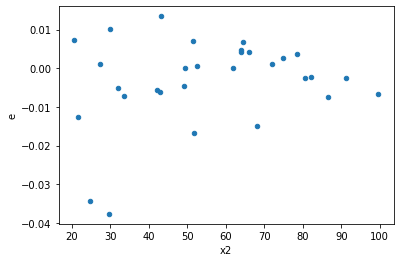

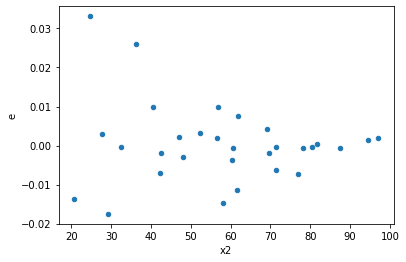

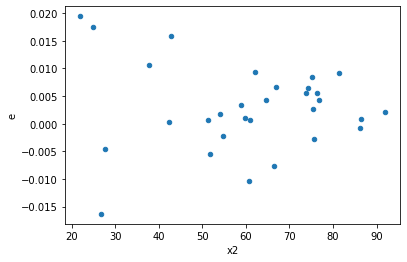

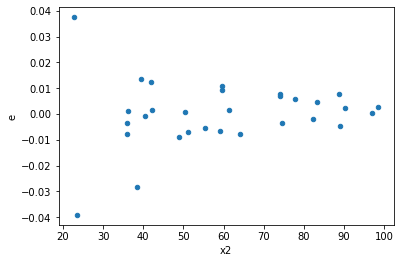

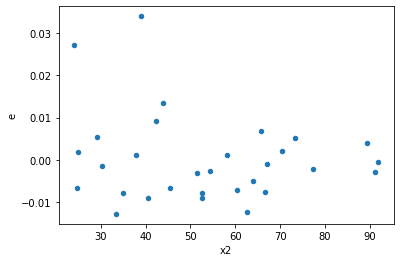

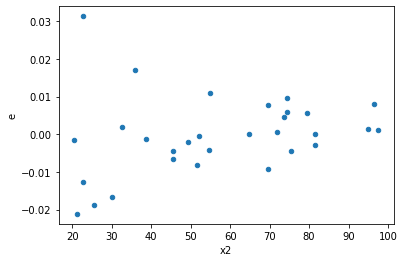

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
23.0,10.0,10.0,0.0032087444988132315,0.0035556969108512713,0.00032087444988132313,0.00035556969108512714,1.108127154457565,0.8742186808367352,0.5628906595816324,0.4371093404183676,Reject005=1 : Homoscedasticity
27.0,10.0,10.0,0.0003817565233800268,0.0006303986966374507,3.817565233800268e-05,6.303986966374507e-05,1.6513108697029608,0.4415318517215314,0.7792340741392343,0.2207659258607657,Reject005=1 : Homoscedasticity
32.0,10.0,10.0,0.0009711364994554083,0.0009893763277692132,9.711364994554083e-05,9.893763277692132e-05,1.0187819408744634,0.9771070625580422,0.5114464687209789,0.4885535312790211,Reject005=1 : Homoscedasticity
83.0,10.0,10.0,0.0009135501146705192,0.0009415657797501469,9.135501146705193e-05,9.415657797501469e-05,1.0306668070308673,0.9628466124179298,0.5185766937910351,0.4814233062089649,Reject005=1 : Homoscedasticity
114.0,10.0,10.0,0.0003655610300135397,0.0009182397146937114,3.655610300135397e-05,9.182397146937114e-05,2.5118643381098407,0.1624061589185677,0.9187969205407162,0.08120307945928384,Reject005=1 : Homoscedasticity
150.0,10.0,10.0,0.00022674424828325376,0.0004253888318137489,2.2674424828325378e-05,4.2538883181374894e-05,1.8760733074134877,0.33571046570715035,0.8321447671464248,0.16785523285357518,Reject005=1 : Homoscedasticity
168.0,10.0,10.0,0.00033677819010312913,0.0004244019161317341,3.3677819010312914e-05,4.244019161317341e-05,1.2601823057537442,0.7216537517123487,0.6391731241438257,0.36082687585617435,Reject005=1 : Homoscedasticity
211.0,10.0,10.0,0.0006075465694881395,0.0009388854692868803,6.0754656948813953e-05,9.388854692868803e-05,1.545372019922514,0.5036891801850731,0.7481554099074634,0.25184459009253657,Reject005=1 : Homoscedasticity
224.0,10.0,10.0,0.0022381331363158794,0.002803042941691375,0.00022381331363158794,0.0002803042941691375,1.2524022347952795,0.7287948396264632,0.6356025801867684,0.3643974198132316,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.001638124119269908,0.00043072715122448394,0.0001638124119269908,4.30727151224484e-05,0.26293926458787126,0.04635597276314535,Reject005=0 : Heteroscedasticity
1.0,10.0,10.0,0.0004706299981763108,0.00017964548677786187,4.7062999817631075e-05,1.7964548677786188e-05,0.3817127838726545,0.14466041034273705,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,0.0024136848509640463,0.0002381976191026123,0.00024136848509640464,2.381976191026123e-05,0.09868629660059976,0.0010805727376632362,Reject005=0 : Heteroscedasticity
3.0,10.0,10.0,0.0007998009089553487,0.00012896409936365792,7.998009089553488e-05,1.2896409936365792e-05,0.16124525231173215,0.007977819286404318,Reject005=0 : Heteroscedasticity
4.0,10.0,10.0,0.0025849283349478,0.00018495584105649785,0.00025849283349478,1.8495584105649785e-05,0.07155163203402033,0.00026621625768270753,Reject005=0 : Heteroscedasticity
5.0,10.0,10.0,0.0020437163502208425,0.00013380803249293552,0.00020437163502208425,1.3380803249293552e-05,0.06547289817321093,0.00017901884738843234,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,0.0004931653887264989,0.00029269995607560307,4.9316538872649885e-05,2.9269995607560306e-05,0.5935127702928267,0.4236149026735643,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,0.0026867771494086404,0.0003569242385370833,0.00026867771494086404,3.569242385370833e-05,0.13284474993232778,0.0037112231242300833,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,0.001760453862953022,0.00045362642136548905,0.0001760453862953022,4.536264213654891e-05,0.2576758362781327,0.04334420008316497,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    586
Reject005=1 : Homoscedasticity      414
Name: Result_test, dtype: int64